# Illinois State Covid-19 Data Analysis Project

10/01/2021
******

The Covid-19 Data Analysis Project collects information from The New York Times. They have been conducting a rolling survey of American colleges and universities to track the number of coronavirus cases reported among students and employees. In this project, we focus on colleges and universities in the state of Illinois, and try to explore the tendency and changes from 2020/10/8 to 2020/12/11. 

This repository is for the project's website: https://github.com/nytimes/covid-19-data.

Start by importing the relevant libraries I plan on using as well as the dataset.

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [231]:
df = pd.read_csv("colleges.csv")

## 1. Dataset

Let's get some info on this dataset.

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       5 non-null      object 
 1   Augustana College                          5 non-null      int64  
 2   Aurora University                          5 non-null      int64  
 3   Benedictine University                     5 non-null      int64  
 4   Blackburn College                          0 non-null      float64
 5   Bradley University                         5 non-null      int64  
 6   Chicago State University                   5 non-null      int64  
 7   Columbia College Chicago                   5 non-null      int64  
 8   Concordia University Chicago               5 non-null      int64  
 9   DePaul University                          5 non-null      int64  
 10  Dominican University          

First, let's check for any missing data.

In [233]:
df.isnull().sum()

Date                                         0
Augustana College                            0
Aurora University                            0
Benedictine University                       0
Blackburn College                            5
Bradley University                           0
Chicago State University                     0
Columbia College Chicago                     0
Concordia University Chicago                 0
DePaul University                            0
Dominican University                         0
Eastern Illinois University                  0
Elmhurst University                          0
Eureka College                               0
Governors State University                   0
Greenville University                        0
Illinois College                             0
Illinois Institute of Technology             0
Illinois State University                    0
Illinois Wesleyan University                 0
Kaskaskia College                            0
Knox College 

Then, let's view the dataset.

In [234]:
df

,Date,Augustana College,Aurora University,Benedictine University,Blackburn College,Bradley University,Chicago State University,Columbia College Chicago,Concordia University Chicago,DePaul University,...,Southeastern Illinois College,Southern Illinois University Carbondale,Southern Illinois University Edwardsville,Southwestern Illinois College,University of Chicago,University of Illinois Springfield,University of Illinois Urbana-Champaign,University of Illinois at Chicago,Western Illinois University,Wheaton College
0,2020/10/8,14,1,7,NaN,338,17,3,2,10,...,9,97,120,NaN,79,22,2621,171,145,4
1,2020/10/22,23,51,7,NaN,351,21,3,4,12,...,11,108,140,NaN,142,67,2802,232,170,4
2,2020/11/5,53,61,19,NaN,365,18,22,10,22,...,16,126,161,NaN,224,77,3241,399,193,6
3,2020/11/19,95,101,31,NaN,405,28,46,35,40,...,26,180,204,NaN,324,130,3892,699,257,9
4,2020/12/11,134,101,45,NaN,429,71,71,63,50,...,28,239,238,NaN,471,177,4407,1220,292,10


We see that there are some missing data in two college columns, which means we lack case data for two colleges or univerisities. Therefore, we need to aviod the two cooleges/universities when analysing data.

## 2. Handling the missing values

Let's simplify this DataFrame.

In [235]:
df.drop('Blackburn College', inplace=True, axis=1)

In [236]:
df.drop('Southwestern Illinois College', inplace=True, axis=1)

Now, we have a simplified DataFrame.

In [237]:
df

,Date,Augustana College,Aurora University,Benedictine University,Bradley University,Chicago State University,Columbia College Chicago,Concordia University Chicago,DePaul University,Dominican University,...,School of the Art Institute of Chicago,Southeastern Illinois College,Southern Illinois University Carbondale,Southern Illinois University Edwardsville,University of Chicago,University of Illinois Springfield,University of Illinois Urbana-Champaign,University of Illinois at Chicago,Western Illinois University,Wheaton College
0,2020/10/8,14,1,7,338,17,3,2,10,28,...,8,9,97,120,79,22,2621,171,145,4
1,2020/10/22,23,51,7,351,21,3,4,12,41,...,10,11,108,140,142,67,2802,232,170,4
2,2020/11/5,53,61,19,365,18,22,10,22,54,...,12,16,126,161,224,77,3241,399,193,6
3,2020/11/19,95,101,31,405,28,46,35,40,96,...,22,26,180,204,324,130,3892,699,257,9
4,2020/12/11,134,101,45,429,71,71,63,50,151,...,41,28,239,238,471,177,4407,1220,292,10


## 3. Graphing Cases and Time Data

The missing values are now successfully handled.

First, let's set time as x-axis, and plot the overview of cumulative data for Covid positive cases in each college or university.

<AxesSubplot:xlabel='Date'>

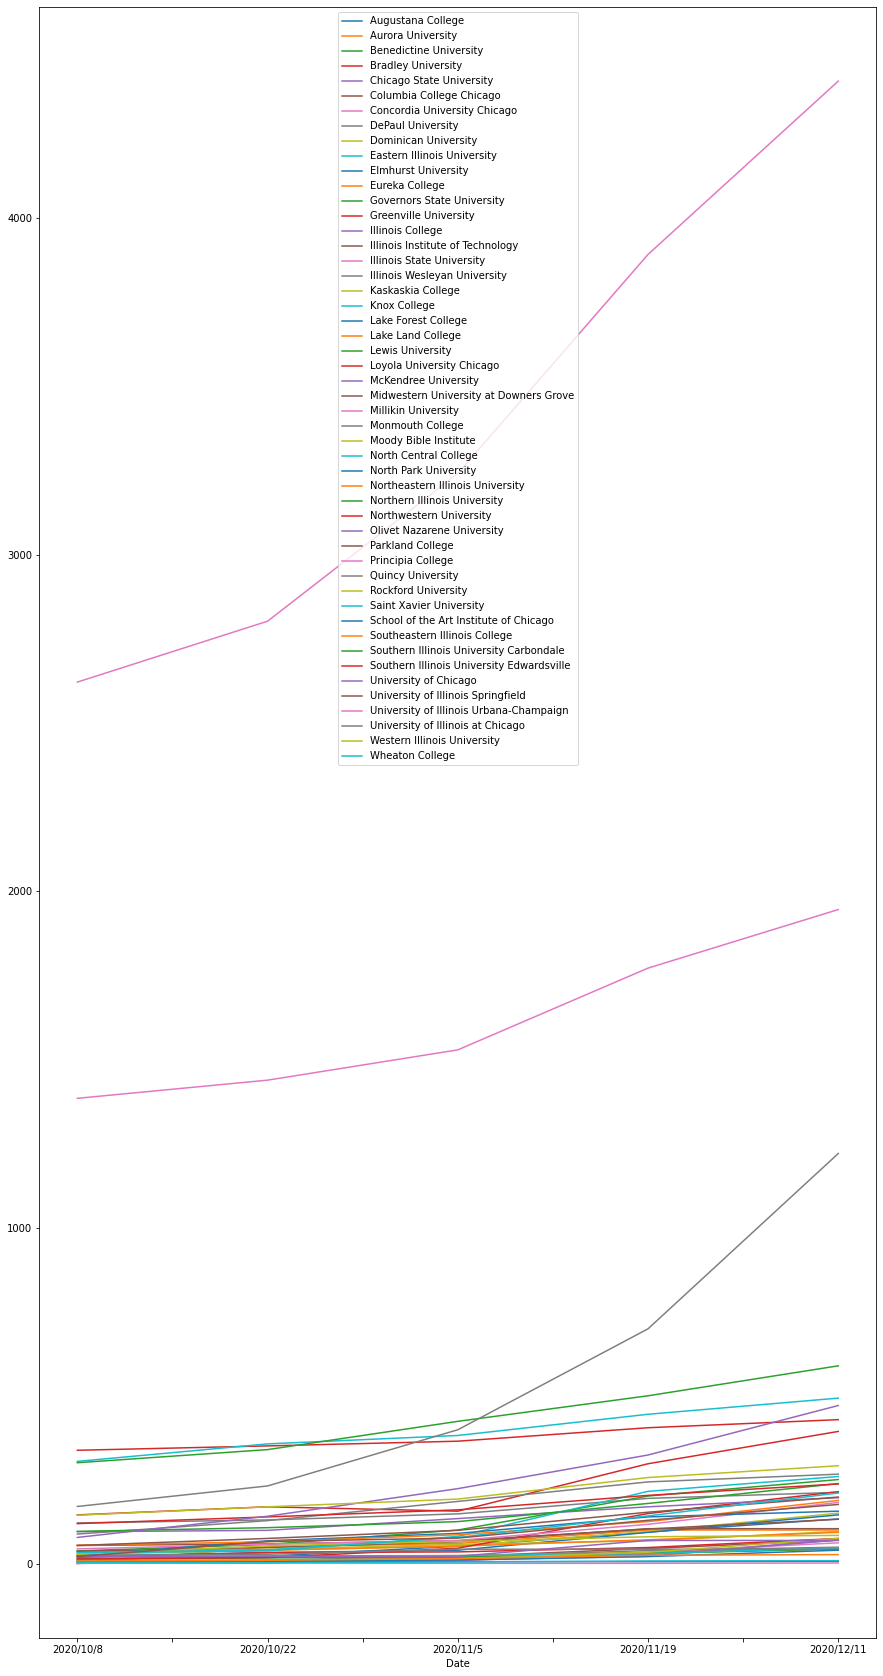

In [238]:
df.set_index("Date").plot(figsize=(15, 30))

Second, let's view graphs for each college and univerisity.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabe

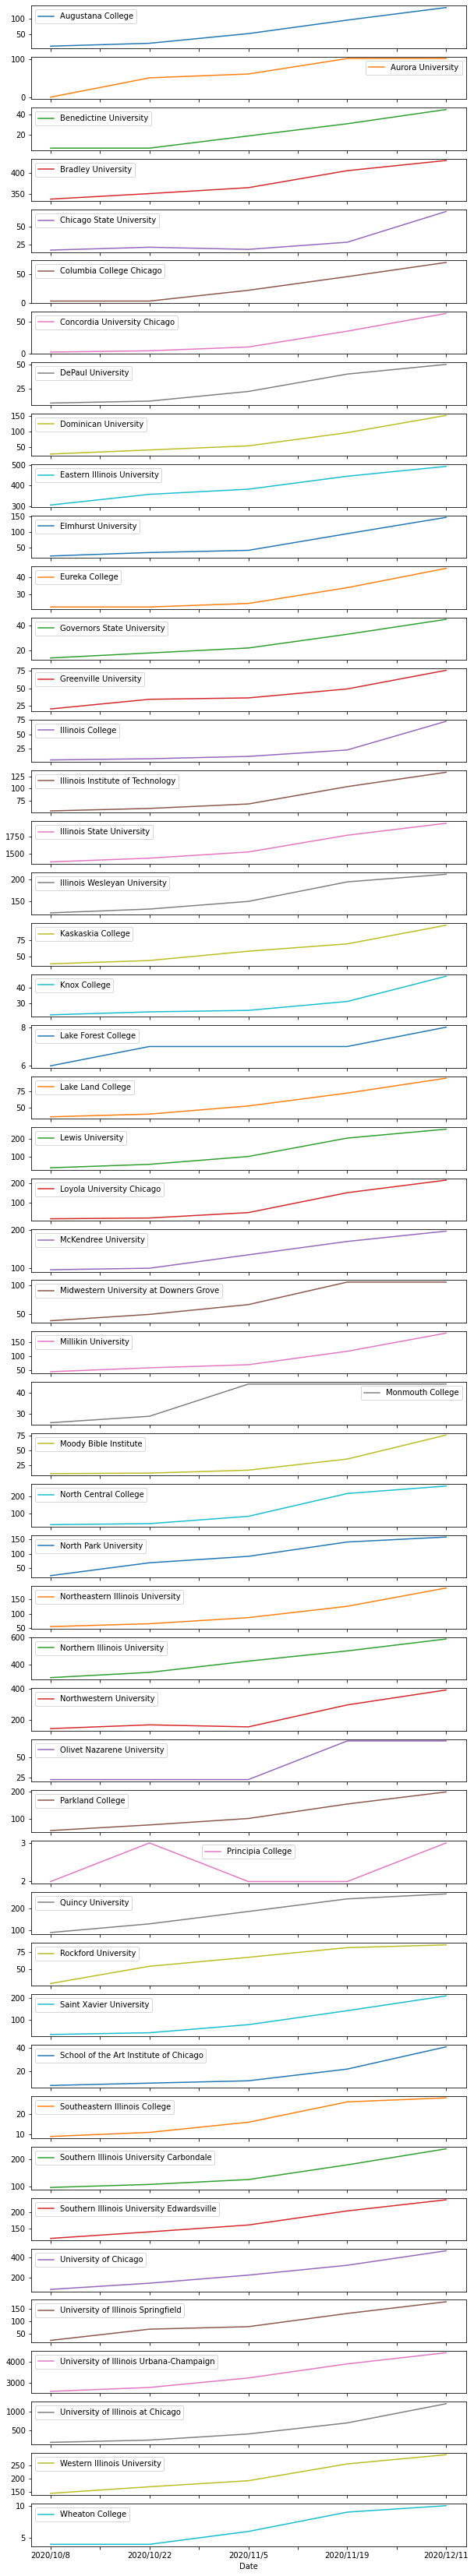

In [239]:
df.set_index('Date').plot(subplots=True, figsize=(10,60))

From the graphs, we can see that University of Illinois Urbana-Champaign have the most number of positive cases. 

## 4. Processing the data (part i)

Since population of each college and university varies, there is a bias when we compare positive case numbers of different institutions. To explore more about trends, we compute the growth of positive cases in each institution.

First, calculate and add some columns to present growth in each institution.

In [240]:
for col in df.columns[1:51]:
    name = col + '_growth'
    df[name] = df[col].diff()
df

,Date,Augustana College,Aurora University,Benedictine University,Bradley University,Chicago State University,Columbia College Chicago,Concordia University Chicago,DePaul University,Dominican University,...,School of the Art Institute of Chicago_growth,Southeastern Illinois College_growth,Southern Illinois University Carbondale_growth,Southern Illinois University Edwardsville_growth,University of Chicago_growth,University of Illinois Springfield_growth,University of Illinois Urbana-Champaign_growth,University of Illinois at Chicago_growth,Western Illinois University_growth,Wheaton College_growth
0,2020/10/8,14,1,7,338,17,3,2,10,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/10/22,23,51,7,351,21,3,4,12,41,...,2.0,2.0,11.0,20.0,63.0,45.0,181.0,61.0,25.0,0.0
2,2020/11/5,53,61,19,365,18,22,10,22,54,...,2.0,5.0,18.0,21.0,82.0,10.0,439.0,167.0,23.0,2.0
3,2020/11/19,95,101,31,405,28,46,35,40,96,...,10.0,10.0,54.0,43.0,100.0,53.0,651.0,300.0,64.0,3.0
4,2020/12/11,134,101,45,429,71,71,63,50,151,...,19.0,2.0,59.0,34.0,147.0,47.0,515.0,521.0,35.0,1.0


Second, create a new DataFrame(df_growth), which only shows the growth.

In [241]:
col_growth = df.columns[51:101]
df_temp = df.loc[:, col_growth]
new_col = df["Date"]  
df_temp.insert(loc=0, column='Date', value=new_col)
df_growth = df_temp.fillna(0)

In [242]:
df_growth

,Date,Augustana College_growth,Aurora University_growth,Benedictine University_growth,Bradley University_growth,Chicago State University_growth,Columbia College Chicago_growth,Concordia University Chicago_growth,DePaul University_growth,Dominican University_growth,...,School of the Art Institute of Chicago_growth,Southeastern Illinois College_growth,Southern Illinois University Carbondale_growth,Southern Illinois University Edwardsville_growth,University of Chicago_growth,University of Illinois Springfield_growth,University of Illinois Urbana-Champaign_growth,University of Illinois at Chicago_growth,Western Illinois University_growth,Wheaton College_growth
0,2020/10/8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020/10/22,9.0,50.0,0.0,13.0,4.0,0.0,2.0,2.0,13.0,...,2.0,2.0,11.0,20.0,63.0,45.0,181.0,61.0,25.0,0.0
2,2020/11/5,30.0,10.0,12.0,14.0,-3.0,19.0,6.0,10.0,13.0,...,2.0,5.0,18.0,21.0,82.0,10.0,439.0,167.0,23.0,2.0
3,2020/11/19,42.0,40.0,12.0,40.0,10.0,24.0,25.0,18.0,42.0,...,10.0,10.0,54.0,43.0,100.0,53.0,651.0,300.0,64.0,3.0
4,2020/12/11,39.0,0.0,14.0,24.0,43.0,25.0,28.0,10.0,55.0,...,19.0,2.0,59.0,34.0,147.0,47.0,515.0,521.0,35.0,1.0


Let's plot each growth tendency.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabe

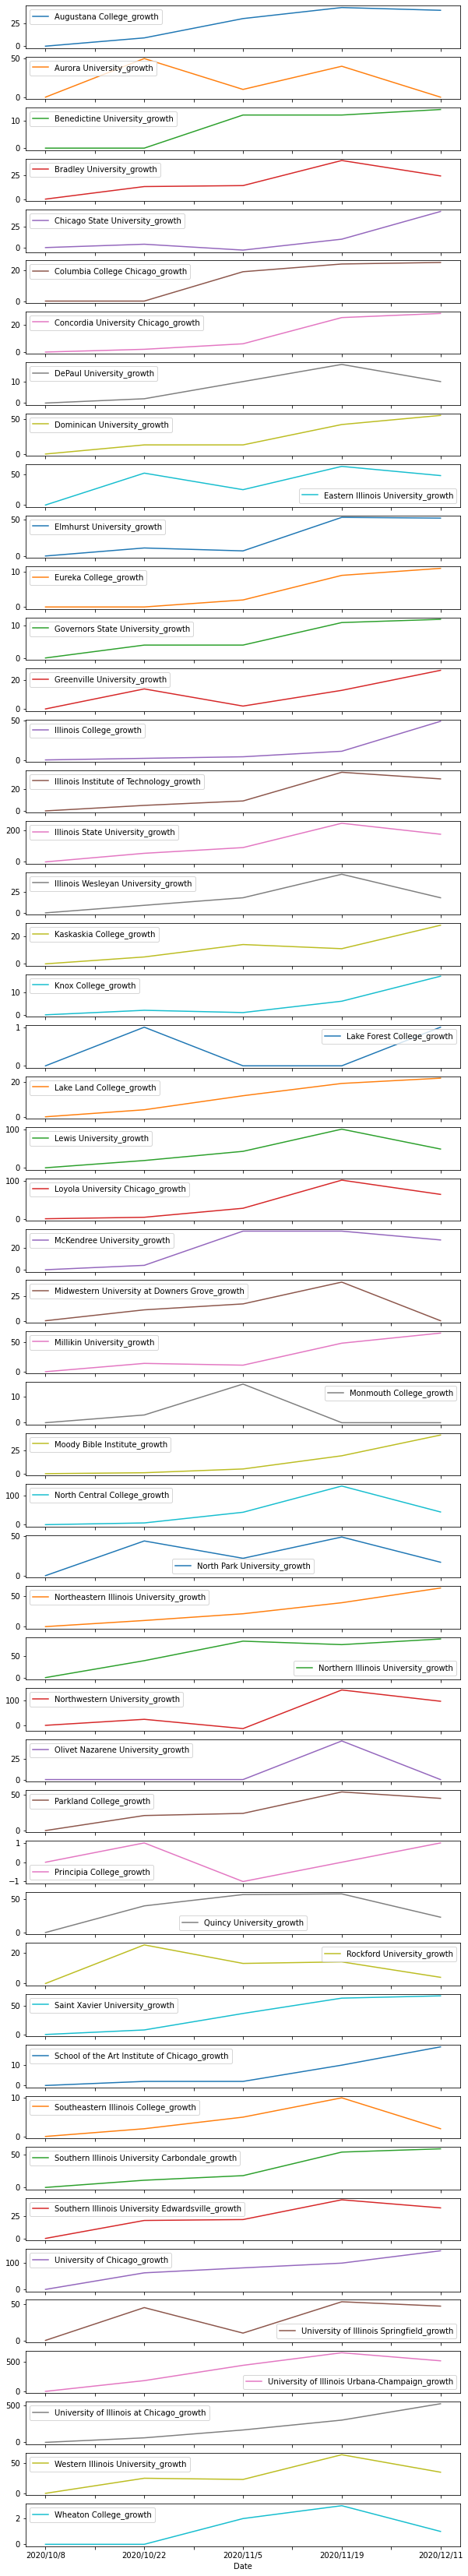

In [243]:
df_growth.set_index('Date').plot(subplots=True, figsize=(10,60))

## 5. Processing the data (part ii)

To see more concise progress for each institution, let's calculate the percentage of changes.

First, calculate and add some columns to present growth in each institution.

In [244]:
for col in df.columns[1:51]:
    name = col + '_pct_growth'
    df[name] = df[col].pct_change()
df

,Date,Augustana College,Aurora University,Benedictine University,Bradley University,Chicago State University,Columbia College Chicago,Concordia University Chicago,DePaul University,Dominican University,...,School of the Art Institute of Chicago_pct_growth,Southeastern Illinois College_pct_growth,Southern Illinois University Carbondale_pct_growth,Southern Illinois University Edwardsville_pct_growth,University of Chicago_pct_growth,University of Illinois Springfield_pct_growth,University of Illinois Urbana-Champaign_pct_growth,University of Illinois at Chicago_pct_growth,Western Illinois University_pct_growth,Wheaton College_pct_growth
0,2020/10/8,14,1,7,338,17,3,2,10,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/10/22,23,51,7,351,21,3,4,12,41,...,0.250000,0.222222,0.113402,0.166667,0.797468,2.045455,0.069058,0.356725,0.172414,0.000000
2,2020/11/5,53,61,19,365,18,22,10,22,54,...,0.200000,0.454545,0.166667,0.150000,0.577465,0.149254,0.156674,0.719828,0.135294,0.500000
3,2020/11/19,95,101,31,405,28,46,35,40,96,...,0.833333,0.625000,0.428571,0.267081,0.446429,0.688312,0.200864,0.751880,0.331606,0.500000
4,2020/12/11,134,101,45,429,71,71,63,50,151,...,0.863636,0.076923,0.327778,0.166667,0.453704,0.361538,0.132323,0.745351,0.136187,0.111111


Second, create a new DataFrame(df_pct_growth), which only shows the percentage of growth.

In [245]:
col_pct = df.columns[101:151]
df_temp = df.loc[:, col_pct]
new_col_pct = df["Date"]  
df_temp.insert(loc=0, column='Date', value=new_col_pct)
df_pct_growth = df_temp.fillna(0)

In [246]:
df_pct_growth

,Date,Augustana College_pct_growth,Aurora University_pct_growth,Benedictine University_pct_growth,Bradley University_pct_growth,Chicago State University_pct_growth,Columbia College Chicago_pct_growth,Concordia University Chicago_pct_growth,DePaul University_pct_growth,Dominican University_pct_growth,...,School of the Art Institute of Chicago_pct_growth,Southeastern Illinois College_pct_growth,Southern Illinois University Carbondale_pct_growth,Southern Illinois University Edwardsville_pct_growth,University of Chicago_pct_growth,University of Illinois Springfield_pct_growth,University of Illinois Urbana-Champaign_pct_growth,University of Illinois at Chicago_pct_growth,Western Illinois University_pct_growth,Wheaton College_pct_growth
0,2020/10/8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020/10/22,0.642857,50.000000,0.000000,0.038462,0.235294,0.000000,1.0,0.200000,0.464286,...,0.250000,0.222222,0.113402,0.166667,0.797468,2.045455,0.069058,0.356725,0.172414,0.000000
2,2020/11/5,1.304348,0.196078,1.714286,0.039886,-0.142857,6.333333,1.5,0.833333,0.317073,...,0.200000,0.454545,0.166667,0.150000,0.577465,0.149254,0.156674,0.719828,0.135294,0.500000
3,2020/11/19,0.792453,0.655738,0.631579,0.109589,0.555556,1.090909,2.5,0.818182,0.777778,...,0.833333,0.625000,0.428571,0.267081,0.446429,0.688312,0.200864,0.751880,0.331606,0.500000
4,2020/12/11,0.410526,0.000000,0.451613,0.059259,1.535714,0.543478,0.8,0.250000,0.572917,...,0.863636,0.076923,0.327778,0.166667,0.453704,0.361538,0.132323,0.745351,0.136187,0.111111


Then, plot the percentage of changes.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabe

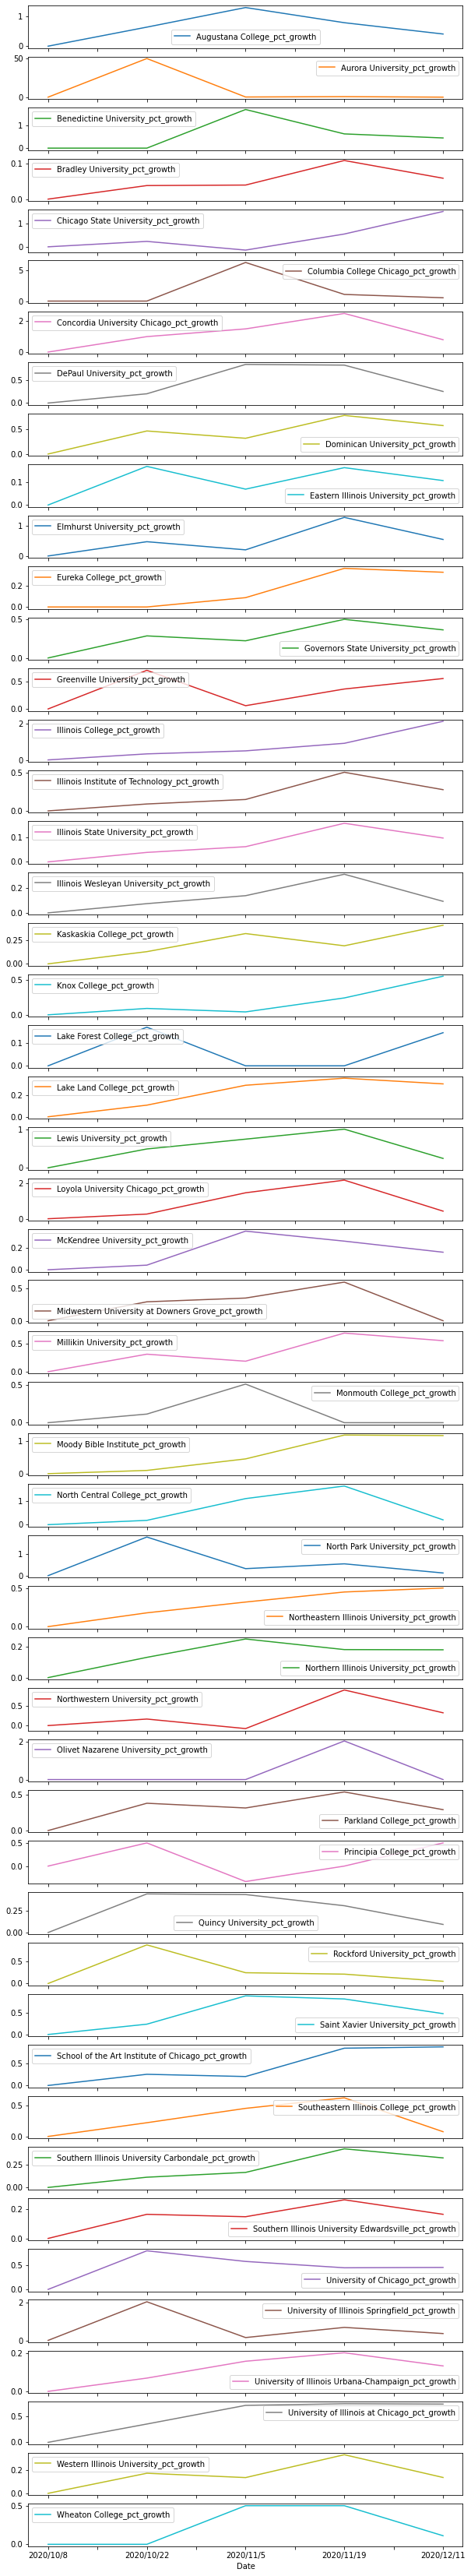

In [247]:
df_pct_growth.set_index('Date').plot(subplots=True, figsize=(10,60))

In [248]:
col_pct = df.columns[101:151]
last_row = df.loc[4, col_pct]
last_row

Augustana College_pct_growth                            0.410526
Aurora University_pct_growth                                 0.0
Benedictine University_pct_growth                       0.451613
Bradley University_pct_growth                           0.059259
Chicago State University_pct_growth                     1.535714
Columbia College Chicago_pct_growth                     0.543478
Concordia University Chicago_pct_growth                      0.8
DePaul University_pct_growth                                0.25
Dominican University_pct_growth                         0.572917
Eastern Illinois University_pct_growth                  0.107865
Elmhurst University_pct_growth                          0.553191
Eureka College_pct_growth                               0.323529
Governors State University_pct_growth                   0.363636
Greenville University_pct_growth                         0.55102
Illinois College_pct_growth                             2.130435
Illinois Institute of Tec

In [249]:
decrease_count = 0
for i in last_row:
    if i < 1:
        decrease_count += 1
decrease_count

47

Therefore, 47 in 50 institutions have the decreasing tendency, which is a optimistic development. 

## 6. Making predictions and evaluating performance

Since the latest update from The New York Times, the source of this dataset, is on 2020/12/11, predicting and evaluating the data is a good idea. 

Taking traditional festivals(Christmas Day, New Year's Day and Martin Luther King Jr. Day) into account, students might gather in large groups. Besides, academic semester ending could result in more flight travels. As a result, gathering and celebrating would reflect on more Covid cases. 

Therefore, we could make predicitons that the number of Covid cases would growing tremendously at the beginning of next semester. 
